# Imports


In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.preprocessing import sequence
from tensorflow.python.keras import Sequential
from keras.models import load_model
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

import pickle

In [260]:
df = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\neural_network_data.csv')

<AxesSubplot:>

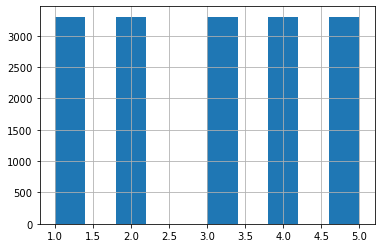

In [261]:
df['rating'].hist()

In [262]:
df['rating'] = df['rating'].fillna((df['rating'].mean()))

In [263]:
df['rating'] = df['rating'].astype(np.int64)

In [264]:
df['review'] = df['review'].astype(str)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16511 entries, 0 to 16510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  16511 non-null  int64 
 1   review  16511 non-null  object
dtypes: int64(1), object(1)
memory usage: 258.1+ KB


# One Hot Encoding Scores Column

In [266]:
df['rating'].describe()

count    16511.000000
mean         3.000121
std          1.414128
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [267]:
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df[['rating']]).toarray())

df = df.join(enc_df)
df = df.rename(columns={0: "rating_1", 1:'rating_2',2:'rating_3',3:'rating_4',4:'rating_5'})
df.head()

,rating,review,rating_1,rating_2,rating_3,rating_4,rating_5
0,1,Its hard to find words that can describe this ...,1.0,0.0,0.0,0.0,0.0
1,1,"Absolutely terrible. Cracked ceiling, tiny roo...",1.0,0.0,0.0,0.0,0.0
2,1,Very disappointed firstly i checked in online ...,1.0,0.0,0.0,0.0,0.0
3,1,First of all we arrived wanting to park at the...,1.0,0.0,0.0,0.0,0.0
4,1,"Hello, I currently staying @ Hilton Metropole...",1.0,0.0,0.0,0.0,0.0


Train - Test Split

In [268]:
x_train, x_test, y_train, y_test = train_test_split(df[['review']], 
                                                    df[['rating_1','rating_2','rating_3','rating_4','rating_5']], 
                                                    test_size=.2, 
                                                    random_state=42)

In [269]:
y_test.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\y_test_neural.csv',index=False)

In [270]:
x_test.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\x_test_neural.csv')

In [271]:
y_train.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\y_train_neural.csv')
x_train.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\x_train_neural.csv')

#   Noktalama işaretlerini Kaldırılması ve Tokanization Yapılması

In [272]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

def text_cleanup(text):

    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        new_text += word + ' '

    return new_text

In [273]:
x_train['review_cleaned'] = x_train['review'].apply(text_cleanup)
x_test['review_cleaned'] = x_test['review'].apply(text_cleanup)

In [274]:
review_index = 2000
print('REVİEW:', x_train['review'].iloc[review_index],)
print('REVİEW_CLEANED', x_train['review_cleaned'].iloc[review_index])

REVİEW: booking did not happen booked hotel trip advisor suggestion, sent visa number confirmation arrived did not booking alternative accom arrived home deducted visa account sent email far not reply, currently trying recover funds bank, definatly not advise using hotel, went hotel colon fantastic, cheryl wilsmore,  
REVİEW_CLEANED booking did not happen booked hotel trip advisor suggestion sent visa number confirmation arrived did not booking alternative accom arrived home deducted visa account sent email far not reply currently trying recover funds bank definatly not advise using hotel went hotel colon fantastic cheryl wilsmore 


In [275]:
x_train

,review,review_cleaned
13105,honeymoon dominican looking reasonably priced ...,honeymoon dominican looking reasonably priced ...
5714,"I was lucky to be upgraded on check -in , bein...",i was lucky to be upgraded on check in being a...
16385,home away home staying hotel trip paris 1981 p...,home away home staying hotel trip paris prior ...
5028,This Hilton hotel has a good location in the h...,this hilton hotel has a good location in the h...
7132,"A great place to stay if visiting Maida Vale, ...",a great place to stay if visiting maida vale s...
...,...,...
11284,not great stayed san juan beach hotel 7/31 til...,not great stayed san juan beach hotel till we ...
11964,nothing exciting stayed night moving phoenicia...,nothing exciting stayed night moving phoenicia...
5390,We stayed just one night in readiness for a mo...,we stayed just one night in readiness for a mo...
860,"A very disappointing first stay, issues with t...",a very disappointing first stay issues with th...


# Her bir kelimenin flat şekilde ayrılması

In [276]:
flat_review = " ".join(x_train['review_cleaned'].values)
flat_review = flat_review.lower().split()

In [277]:
flat_review

['honeymoon',
 'dominican',
 'looking',
 'reasonably',
 'priced',
 'vacation',
 'n',
 't',
 'extravagant',
 'fun',
 'iberostar',
 'good',
 'choice',
 'we',
 'honeymoon',
 'punta',
 'cana',
 'september',
 'sponsored',
 'apple',
 'vacations',
 'inclusive',
 'deal',
 'apple',
 'great',
 'accomodation',
 'plan',
 'includes',
 'tips',
 'expect',
 'area',
 'terms',
 'people',
 'things',
 'staff',
 'friendly',
 'extremely',
 'helpful',
 'i',
 'bit',
 'disappointed',
 'room',
 'iberostar',
 'got',
 'season',
 'gave',
 'room',
 'w',
 'a',
 'view',
 'nothing',
 'set',
 'nice',
 'room',
 'pool',
 'day',
 'w',
 'out',
 'hassles',
 'i',
 'mexico',
 'noticeable',
 'difference',
 'people',
 'dominican',
 'people',
 'friendly',
 'grateful',
 'tourism',
 'tried',
 'communicate',
 'enjoyable',
 'mexico',
 'not',
 'friendly',
 'resort',
 'stayed',
 'language',
 'barrier',
 'bad',
 'n',
 't',
 'speaking',
 'english',
 'help',
 'despite',
 'travel',
 'agents',
 'right',
 'site',
 'my',
 'husband',
 'loved'

In [278]:
len(flat_review)

1375224

In [279]:
unique_list = []
for word in flat_review:
    if word not in unique_list:
        unique_list.append(word)

In [280]:
len(unique_list)

30894

In [281]:
word_index_dict = {}
for i in range(0,len(unique_list)):
    word_index_dict[unique_list[i]] = i

In [282]:
 #word_index_dict

In [283]:
#word_index_dict.items()

In [284]:
word_index_dict = {k:(v+4) for k,v in word_index_dict.items()}
word_index_dict['<PAD>'] = 0
word_index_dict['<START>'] = 1
word_index_dict['<UNK>'] = 2  #Unkown Words
word_index_dict['<UNUSED>'] = 3

In [285]:
#word_index_dict.items()

In [286]:
len(word_index_dict)

30898

# Indexing Words in Reviews Using Dictionary

In [287]:
def index_review_words(text):
    review_word_list = []
    for word in text.lower().split():
        if word in word_index_dict.keys():
            review_word_list.append(word_index_dict[word])
        else:
            review_word_list.append(word_index_dict['<UNK>'])

    return review_word_list

In [288]:
x_train['preprocessed_review'] = x_train['review_cleaned'].apply(index_review_words)
x_test['preprocessed_review'] = x_test['review_cleaned'].apply(index_review_words)

In [289]:
x_train.head()

,review,review_cleaned,preprocessed_review
13105,honeymoon dominican looking reasonably priced ...,honeymoon dominican looking reasonably priced ...,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
5714,"I was lucky to be upgraded on check -in , bein...",i was lucky to be upgraded on check in being a...,"[40, 118, 119, 120, 121, 122, 123, 124, 125, 1..."
16385,home away home staying hotel trip paris 1981 p...,home away home staying hotel trip paris prior ...,"[206, 207, 206, 208, 209, 210, 211, 212, 213, ..."
5028,This Hilton hotel has a good location in the h...,this hilton hotel has a good location in the h...,"[249, 250, 209, 251, 48, 15, 218, 125, 93, 252..."
7132,"A great place to stay if visiting Maida Vale, ...",a great place to stay if visiting maida vale s...,"[48, 26, 216, 120, 113, 316, 317, 318, 319, 23..."


In [290]:
x_train['preprocessed_review'].describe()

count       13208
unique      13207
top       [23127]
freq            2
Name: preprocessed_review, dtype: object

In [291]:
x_train['preprocessed_review'].shape

(13208,)

In [292]:
from keras import preprocessing
import keras
from keras.utils import pad_sequences

In [293]:
from keras_preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)  #value=0
x_test = pad_sequences(x_test['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)

In [294]:
x_train.shape

(13208, 250)

In [295]:
np.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\/x_test',x_test)

In [296]:
y_train.shape

(13208, 5)

In [297]:
x_test.shape

(3303, 250)

In [298]:
y_test.shape

(3303, 5)

In [299]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.2,random_state=42)

In [300]:
from tensorflow import keras
from tensorflow.keras import layers

unique_list_len = len(word_index_dict)
##
model = Sequential()
model.add(Embedding(unique_list_len,64))
model.add(GlobalAveragePooling1D())
model.add(Dense(5,activation='sigmoid'))

##
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
###
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=250,
    validation_data=(x_val,y_val),)
###


Epoch 1/20
43/43 [==============================] - 2s 30ms/step - loss: 1.6046 - accuracy: 0.2363 - val_loss: 1.6001 - val_accuracy: 0.2657
Epoch 2/20
43/43 [==============================] - 1s 24ms/step - loss: 1.5905 - accuracy: 0.3097 - val_loss: 1.5846 - val_accuracy: 0.3013
Epoch 3/20
43/43 [==============================] - 1s 25ms/step - loss: 1.5680 - accuracy: 0.3223 - val_loss: 1.5600 - val_accuracy: 0.3066
Epoch 4/20
43/43 [==============================] - 1s 24ms/step - loss: 1.5363 - accuracy: 0.3578 - val_loss: 1.5276 - val_accuracy: 0.3425
Epoch 5/20
43/43 [==============================] - 1s 26ms/step - loss: 1.4974 - accuracy: 0.3832 - val_loss: 1.4902 - val_accuracy: 0.3656
Epoch 6/20
43/43 [==============================] - 1s 24ms/step - loss: 1.4526 - accuracy: 0.4161 - val_loss: 1.4487 - val_accuracy: 0.3974
Epoch 7/20
43/43 [==============================] - 1s 26ms/step - loss: 1.4044 - accuracy: 0.4531 - val_loss: 1.4053 - val_accuracy: 0.4254
Epoch 8/20
43

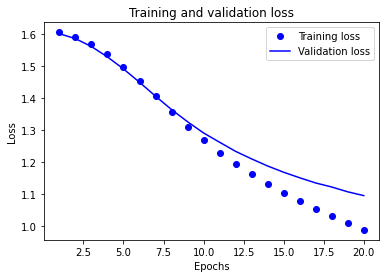

In [301]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

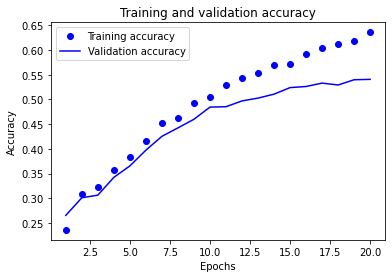

In [302]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [303]:
def reverse_encode(y_df):

    y_df['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)
    for i in range(0,len(y_df)):
        if y_df.iloc[i,-1] == 'score_1':
            y_df.iloc[i,-1] = 1
        elif y_df.iloc[i,-1] == 'score_2':
            y_df.iloc[i,-1] = 2
        elif y_df.iloc[i,-1]== 'score_3':
            y_df.iloc[i,-1] = 3
        elif y_df.iloc[i,-1]== 'score_4':
            y_df.iloc[i,-1] = 4
        elif y_df.iloc[i,-1] == 'score_5':
            y_df.iloc[i,-1]= 5

In [304]:
yy_test = y_test
yy_val = y_val

reverse_encode(yy_test)
reverse_encode(yy_val)

In [305]:
def add_one_argmax_score(x):

    x = x+1

    return x

In [306]:
yy_test_predicted = add_one_argmax_score(np.argmax(model.predict(x_test),axis=1))

In [307]:
y_test.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/y_test_nn_df.csv',index=False)
np.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/y_test_predicted_array',y_test_predicted)

In [308]:
yy_test['score']

5376     rating_3
14526    rating_4
3402     rating_2
13343    rating_3
3844     rating_3
           ...   
10444    rating_1
8882     rating_5
8665     rating_5
13777    rating_4
13133    rating_3
Name: score, Length: 3303, dtype: object

In [309]:
yy_test['score'] = yy_test['score'].replace(['rating_1'],1)
yy_test['score'] = yy_test['score'].replace(['rating_2'],2)
yy_test['score'] = yy_test['score'].replace(['rating_3'],3)
yy_test['score'] = yy_test['score'].replace(['rating_4'],4)
yy_test['score'] = yy_test['score'].replace(['rating_5'],5)

In [310]:
yy_test['score'] = yy_test['score'].astype(np.int64)

In [311]:
def conf_matrix(cm):

    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[1,2,3,4,5],
                     yticklabels=[1,2,3,4,5])
    ax.set(xlabel='Predicted', ylabel='True')
    plt.show()

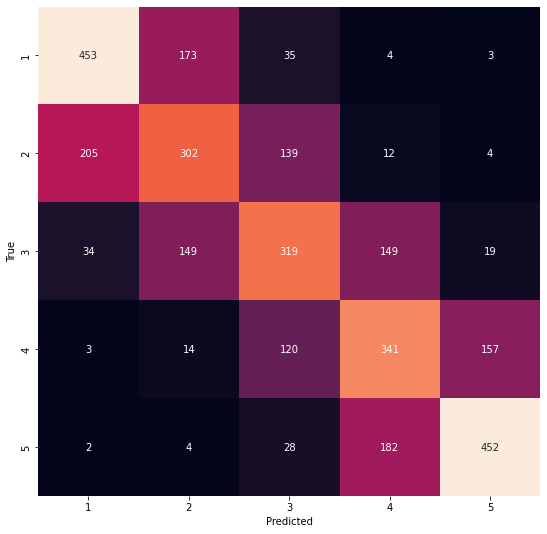

In [312]:
test_cm = confusion_matrix(yy_test['score'], y_test_predicted)
conf_matrix(test_cm)

In [313]:
model.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/Models/Neural_Network.h5')

In [314]:
pickle.dump(word_index_dict,open(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/word_index_dict.pkl','wb'))